## Introdução ao projeto

Neste projeto iremos abordar risco de inadimplência de uma base de dados. O projeto é preparar um relatório para a divisão de empréstimos de um banco. Vamos realizar uma série de analises para descobrir as seguintes relações:
Existe alguma relação entre ter filhos e pagar um empréstimo em dia?
Existe alguma relação entre o estado civil e o pagamento de um empréstimo no prazo estipulado?
Existe uma relação entre o nível de renda e o pagamento de um empréstimo no prazo?
Como as diferentes finalidades do empréstimo afetam o pagamento pontual do empréstimo?
Para tal, iremos passar pelas fases de:
Pré-processamento de dados;
Limpeza de dados e processamento;
Categorização de dados ou Clusterização;
Análise de premissas e descoberta de relações.
Iremos utilizar da base de dados fornecida pelo banco para a análise geral. Teremos que ter muito cuidado com dados ausentes, duplicados ou duplicatas implícitas durante o decorrer do projeto.


Iremos abordar e trabalhar com bases de dados de uma empresa de telecomunicação chamada Megaline. Os planos oferecidos são pré-pagos e são chamados de planos Surf e Ultimate. Foi requisitado pela equipe comercial quais planos estão dando mais receita, ou seja, são mais rentáveis para uma publicidade.

Vamos testar algumas hipóteses como:
* 		A receita média dos usuários dos planos Ultimate e Surf são diferentes.
* 		A receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões.

Iremos encontrar os seguintes dados:
* 	O número de chamadas feitas e minutos usados por mês.
* 		O número de mensagens de texto enviadas por mês.
* 		O volume de dados por mês.
* 		A receita mensal para cada usuário (subtraia o limite do pacote grátis do número total de chamadas, mensagens de texto, e dados; multiplique o resultado pelos valores do plano; adicione o preço mensal dependendo do plano de chamada)


Iremos passar pelas etapas de preparação de dados, análise de dados, teste de hipóteses. 

Para explicitar melhor os planos abordados acima iremos descrever cada qual com sua peculiariedade:

**Surf**

a. Preço mensal: $20

b. 500 minutos mensais - 50 mensagens de texto - e 15 GB de dados

c. Depois de exceder os limites do pacote:

    * 		1 minuto: 3 centavos
    
    * 		1 mensagem de texto: 3 centavos
    
    * 		1 GB de dados: $10
    
    
**Ultimate**

a. Preço mensal: $70

b. 3000 minutos mensais, 1000 mensagens de texto, e 30 GB de dados

c. Depois de exceder os limites do pacote:

    *       1 minuto: 1 centavo
    
    * 		1 mensagem de texto: 1 centavo
    
    * 		1 GB de dados: $7
    
    
É importante citar, também, que a Megaline arredonda segundos para minutos, e megabytes para gigabytes. Para chamadas, cada chamada individual é arredondada para cima: mesmo se uma chamada tenha durado apenas um segundo, será contado como um minuto. Para trafego de web, sessões individuais de web não são arredondadas para cima. Ao invés disso, o total do mês é arredondado para cima. Se alguém usar 1025 megabytes esse mês, eles serão cobrados por 2 gigabytes.

## Inicialização

Iremos carregar aqui todas as nossas bibliotecas necessárias e explicar o porquê.

Assim, iremos utilizar das bibliotecas:

pandas --> para criação de DataFrame e analises gerais;

numpy --> trabalhar com matemática e estatística avançada;

matplotlib --> trabalhar com geração dos gráficos;

scipy.stats --> trabalhar com testes de hipóteses de t de student e ANOVA;

pairwise_tukeyhsd --> trabalhar com teste de Tuckey;

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Carregar dados

Nessa seção iremos ler os arquivos separadamente.

Temos 5 bases de dados para trabalhar. 

Iremos dar os nomes de maneira que seja fácil o entendimento.

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames

# DB ligações
# Carregando dados no computador pessoal
try:
    df_calls = pd.read_csv(r'/Users/gabrielreus/Downloads/megaline_calls.csv')
    
# Carregando dados no JupyterHub
except:
    df_calls = pd.read_csv(r'/datasets/megaline_calls.csv')
    

# DB internet
# Carregando dados no computador pessoal
try:
    df_internet = pd.read_csv(r'/Users/gabrielreus/Downloads/megaline_internet.csv')
    
# Carregando dados no JupyterHub
except:
    df_internet = pd.read_csv(r'/datasets/megaline_internet.csv')
    
    
# DB SMS
# Carregando dados no computador pessoal
try:
    df_sms = pd.read_csv(r'/Users/gabrielreus/Downloads/megaline_messages.csv')
    
# Carregando dados no JupyterHub
except:
    df_sms = pd.read_csv(r'/datasets/megaline_messages.csv')
    

# DB planos
# Carregando dados no computador pessoal
try:
    df_planos = pd.read_csv(r'/Users/gabrielreus/Downloads/megaline_plans.csv')
    
# Carregando dados no JupyterHub
except:
    df_planos = pd.read_csv(r'/datasets/megaline_plans.csv')
    
    
# DB usuários
# Carregando dados no computador pessoal
try:
    df_users = pd.read_csv(r'/Users/gabrielreus/Downloads/megaline_users.csv')
    
# Carregando dados no JupyterHub
except:
    df_users = pd.read_csv(r'/datasets/megaline_users.csv')

## Preparar os dados



Neste caso temos algumas bases de dados, iremos segmentar a análise e preparação dos dados por DataFrame criada para dar continuidade de maneira mais organizada.

Assim iremos passar pelas etapas para cada base de dados:

* Entender as informações gerais e resumidas
* Amostrar os dados
* Conclusões iniciais
* Correção dos dados encontrados;
* Adição de dados se necessário para o enriquecimento de dados.

## Planos

In [3]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
df_planos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprimir uma amostra de dados para os planos
df_planos.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



Como sabemos que empresa arredonda os valores de MB para GB, como dito anteriormente seria interessante alterar o valor a coluna do mb_per_month_included para valores cheios de 15000 e 30000.

As outras colunas estão ok.

## Corrigir dados

[Corrija problemas óbvios com os dados de acordo com as observações iniciais.]

Iremos corrigir os valores da coluna mb_per_month_included.

In [5]:
# Arredondando para baixo os valores
df_planos['mb_per_month_included'] = np.floor(df_planos['mb_per_month_included'] / 1000) * 1000
df_planos['mb_per_month_included'] = df_planos['mb_per_month_included'].astype(int)
df_planos

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15000,500,20,10,0.03,0.03,surf
1,1000,30000,3000,70,7,0.01,0.01,ultimate


## Enriqueça os dados


Vamos adicionar uma coluna adicional chamada:

* gb_per_month_included

Iremos utilizar essa coluna para ter uma coluna em GB, talvez possa ser útil futuramente para cálculos de volume de dados.

In [6]:
# Criando a coluna
df_planos['gb_per_month_included'] = df_planos['mb_per_month_included'] / 1000
df_planos['gb_per_month_included'] = df_planos['gb_per_month_included'].astype(int)

# Verificando
df_planos

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15000,500,20,10,0.03,0.03,surf,15
1,1000,30000,3000,70,7,0.01,0.01,ultimate,30


## Usuários

In [7]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprimir uma amostra de dados para usuários
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN



Inicialmente, podemos observar que aparentemente os dados estão dispostos de maneira correta. 

A coluna **churn_date** demonstra que há linhas sem dados, neste caso quando não há valores é porque o cliente não parou de utilizar os serviços. Já os que constam valores de datas é que pararam de utilizar os serviços.

A coluna **city** está separada por com uma vírgula a cidade do estado. Iremos utilizar esse dado posteriormente e o que podemos fazer é separar a parte com vírgula.

Vamos analisar, também, as colunas **age**, **reg_date**, **plan** e **churn_date** com valores únicos para observar se há algo muito fora do padrão.

As colunas de datas estão como object type, iremos alterar para dtype.

### Coluna age

Iremos analisar os valores de distribuição, máximos, mínimos e valores únicos.

In [9]:
# Análise coluna idade mínimo
df_users['age'].min()

18

In [10]:
# Análise coluna idade máximo
df_users['age'].max()

75

In [11]:
# Valores únicos
df_users['age'].unique()

array([45, 28, 36, 52, 40, 31, 73, 42, 53, 19, 59, 50, 61, 26, 30, 70, 34,
       56, 37, 74, 64, 49, 38, 57, 22, 67, 20, 32, 72, 58, 25, 23, 55, 47,
       27, 33, 18, 41, 60, 46, 66, 29, 69, 35, 51, 48, 44, 65, 21, 54, 75,
       39, 68, 71, 63, 24, 43, 62])

<AxesSubplot:>

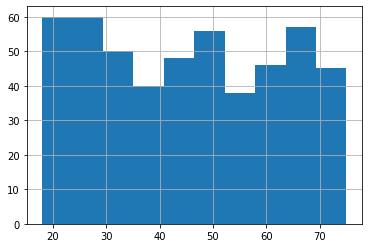

In [12]:
# Distribuição idade
df_users['age'].hist()

### Coluna reg_date

Vamos analisar a coluna por valores discrepantes de data. Vamos pegar os valores únicos

In [13]:
df_users['reg_date'].unique()

array(['2018-12-24', '2018-08-13', '2018-10-21', '2018-01-28',
       '2018-05-23', '2018-11-29', '2018-11-27', '2018-07-11',
       '2018-08-03', '2018-04-22', '2018-03-09', '2018-01-18',
       '2018-06-28', '2018-12-01', '2018-11-25', '2018-12-05',
       '2018-10-25', '2018-08-26', '2018-10-17', '2018-01-16',
       '2018-11-08', '2018-12-21', '2018-04-20', '2018-07-06',
       '2018-08-21', '2018-10-28', '2018-07-20', '2018-06-26',
       '2018-02-21', '2018-01-05', '2018-02-14', '2018-07-15',
       '2018-06-07', '2018-05-30', '2018-12-08', '2018-05-09',
       '2018-08-11', '2018-06-25', '2018-12-23', '2018-03-17',
       '2018-01-15', '2018-06-20', '2018-08-30', '2018-10-15',
       '2018-02-19', '2018-06-16', '2018-08-24', '2018-03-20',
       '2018-12-11', '2018-03-05', '2018-07-30', '2018-04-21',
       '2018-01-13', '2018-03-01', '2018-08-07', '2018-11-06',
       '2018-04-07', '2018-03-08', '2018-02-06', '2018-11-05',
       '2018-06-03', '2018-09-24', '2018-01-29', '2018-

Não encontramos nenhum dado discrepante.

Utilizamos a função unique para facilitar inicialmente e não transformar, ainda, em dtype. 

Como pode-se ver todos os dados são do ano de 2018.

### Coluna plan

Para a coluna plan iremos analisar os valores únicos

In [14]:
# Valores únicos
df_users['plan'].unique()

array(['ultimate', 'surf'], dtype=object)

Os dados estão corretos sem nenhuma discrepância.

### Coluna churn_date

Iremos analisar de início a coluna coletando os dados únicos.

In [15]:
# Coluna churn_date
df_users['churn_date'].unique()

array([nan, '2018-12-18', '2018-11-16', '2018-09-07', '2018-12-30',
       '2018-10-07', '2018-12-31', '2018-11-24', '2018-11-11',
       '2018-12-12', '2018-11-14', '2018-12-27', '2018-11-29',
       '2018-12-22', '2018-11-30', '2018-10-13', '2018-07-31',
       '2018-12-15', '2018-12-19', '2018-10-03', '2018-10-22',
       '2018-08-16', '2018-12-26', '2018-09-01', '2018-11-21',
       '2018-08-19', '2018-12-10', '2018-09-17', '2018-11-18',
       '2018-09-18'], dtype=object)

Não existem valores discrepantes para essa coluna, iremos deixar ela em nossa análise.

Para análises posteriores que iremos utilizar não se fará necessário o uso destes dados e iremos considerar os clientes que tiveram churn para nossa análise.

Se tirassemos os clientes que já saíram perderíamos, aproximadamente, 6,8% dos dados dos clientes.

Iremos substituir NaN por 0 retirando valores ausentes.

### Corrigir dados


Iremos substituir os valores NaN da coluna churn_date por 0.

Iremos transformar os dados de reg_date para dtype.

In [16]:
# Substituindo valores NaN por 0 
df_users['churn_date'] = df_users['churn_date'].fillna(0)

df_users['churn_date'].unique()

array([0, '2018-12-18', '2018-11-16', '2018-09-07', '2018-12-30',
       '2018-10-07', '2018-12-31', '2018-11-24', '2018-11-11',
       '2018-12-12', '2018-11-14', '2018-12-27', '2018-11-29',
       '2018-12-22', '2018-11-30', '2018-10-13', '2018-07-31',
       '2018-12-15', '2018-12-19', '2018-10-03', '2018-10-22',
       '2018-08-16', '2018-12-26', '2018-09-01', '2018-11-21',
       '2018-08-19', '2018-12-10', '2018-09-17', '2018-11-18',
       '2018-09-18'], dtype=object)

In [17]:
# Transformar reg_date para datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer Dados


Iremos coletar da coluna city o estado federativo do cliente e armazenar em uma coluna chamada state.

In [18]:
# Extraindo o nome do estado
df_users['state'] = df_users['city'].str.split(',').str[-1].str.strip()


# Analisando a coluna state
df_users['state'].unique()

array(['GA MSA', 'WA MSA', 'NV MSA', 'OK MSA', 'TX MSA', 'CA MSA',
       'MI MSA', 'FL MSA', 'OH MSA', 'IL-IN-WI MSA', 'TN MSA',
       'NY-NJ-PA MSA', 'PA MSA', 'DC-VA-MD-WV MSA', 'IN MSA', 'NE-IA MSA',
       'PA-NJ-DE-MD MSA', 'AL MSA', 'NC-SC MSA', 'CO MSA', 'NM MSA',
       'MA-NH MSA', 'AZ MSA', 'OR-WA MSA', 'OH-KY-IN MSA', 'SC MSA',
       'NY MSA', 'TN-MS-AR MSA', 'KY-IN MSA', 'RI-MA MSA', 'UT MSA',
       'HI MSA', 'CT MSA', 'LA MSA', 'VA-NC MSA', 'MD MSA', 'WI MSA',
       'VA MSA', 'MO-IL MSA', 'MN-WI MSA', 'MO-KS MSA', 'NC MSA'],
      dtype=object)

Podemos observar que há várias colunas com a ocorrência de que foram registrados vários estados. Iremos calcular a ocorrência disso na df primeiramente para decidir algo posteriormente.

In [19]:
# Contar o número de linhas que contêm a string '-'
count = df_users['state'].str.contains('-').sum()

print(count)

195


In [20]:
# Análisando colunas que contem '-'
df_test = df_users[df_users['state'].str.contains('-')]
df_test

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,IL-IN-WI MSA
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,0,NY-NJ-PA MSA
17,1017,Boris,Gates,61,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-08-26,surf,0,DC-VA-MD-WV MSA
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,NY-NJ-PA MSA
23,1023,Jack,Delaney,70,"Omaha-Council Bluffs, NE-IA MSA",2018-07-06,surf,0,NE-IA MSA
...,...,...,...,...,...,...,...,...,...
492,1492,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,0,OR-WA MSA
493,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,0,MA-NH MSA
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,0,NY-NJ-PA MSA
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,0,NY-NJ-PA MSA


Vamos, neste caso, deixar os usuários que tem cadastro em multiplas cidades, pois se retirar de nossa análise pode afetar nossos resultados finais.

## Chamadas

In [21]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [22]:
# Imprimir uma amostra de dados para chamadas
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40



Podemos observar que não existem valores ausentes nas colunas.

Analisando as colunas de df, pode-se observar que os registros de ligações são armazenados separadamente cada qual um número de **id** diferente.

Como sabe-se a duração das chamadas sempre é arredondada para cima, ou seja, 4:30 minutos viram 5 minutos. A coluna duration está como float(64) precisamos converter para minutos e arredondar para cima. Por exemplo, 5.77 minutos corresponde a 5 minutos e 46 segundos. Iremos utilizar uma conversão para arredondar para minutos com arredondamento para cima.

Iremos alterar a coluna **call_date** para datetime.

Iremos analisar a distribuição para os valores de **duration** menor que 1 minuto. Assim vamos observar a distribuição e decidir como iremos trabalhar com os dados dessa categoria.

<AxesSubplot:>

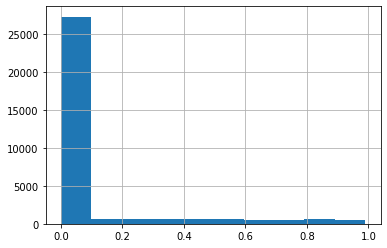

In [23]:
# Distribuição para valores menores que 1 minutos
df_calls[df_calls['duration'] < 1]['duration'].hist()

In [24]:
# Valor máximo e mínimo
print(df_calls[df_calls['duration'] < 1]['duration'].max())
print(df_calls[df_calls['duration'] < 1]['duration'].min())

0.99
0.0


Podemos observar que a concentração de valores está entre 0 a 10 segundos. Assim iremos analisar a contagem desses valores no filtro.

In [25]:
# Contagem de 0 a 10 segundos
print(df_calls[df_calls['duration'] < 0.1]['duration'].count())

27306


**Conclusão final**:

Temos uma grande concentração de valores entre a faixa de 0 a 10 segundos. Temos que considerar que os dados estão em base de minutos.

Assim 0,1 minutos é que vale 0,6 segundos de ligação. Logicamente se pensarmos uma ligação mínima pode ter a partir de 0 segundos, mas não é garantido, pois podemos ter ligações que caíram em caixa postal ou algo do tipo.

Para garantir isso, apesar do volume considerável de dados que iremos perder, vamos utilizar a regra de que só serão validas as ligações acima de 0,1 minutos para nossa conta, assim iremos filtrar os outros retirando possíveis erros.

0,1 minutos é o equivalente a 6 segundos, tempo suficiente para uma ligação em caixa postal. Assim iremos contar somente com dados de ligações.

Iremos perder, aproximadamente, 19% dos dados originais de ligações.

### Corrigir dados


Iremos corrigir os dados em **duration** e **call_date**.

In [26]:
# Filtrando para valores de duration acima ou igual a 0,1 minutos
df_calls = df_calls[df_calls['duration'] >= 0.1]
df_calls['duration'].min()

0.1

In [27]:
# Arredondamento para coluna duration

# Converter para minutos inteiros arredondados para cima
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)

# Converter para datetime a coluna call_date
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

# Visualizar
print(df_calls)

# Informações gerais
print(df_calls.info())

              id  user_id  call_date  duration
0        1000_93     1000 2018-12-27         9
1       1000_145     1000 2018-12-27        14
2       1000_247     1000 2018-12-27        15
3       1000_309     1000 2018-12-28         6
4       1000_380     1000 2018-12-30         5
...          ...      ...        ...       ...
137730  1499_199     1499 2018-11-21         9
137731  1499_200     1499 2018-10-20        11
137732  1499_201     1499 2018-09-21         9
137733  1499_202     1499 2018-10-10         1
137734  1499_203     1499 2018-12-29        14

[110429 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110429 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110429 non-null  object        
 1   user_id    110429 non-null  int64         
 2   call_date  110429 non-null  datetime64[ns]
 3   duration   110429 non-null  int64         
dtypes: dat

Iremos analisar antes coluna **duration** para valores únicos e o número de ocorrências para decidir o que iremos fazer com a coluna. Faremos agora porque os valores estão arredondados.

In [28]:
# Valores único em duration
df_calls['duration'].unique()

array([ 9, 14, 15,  6,  5,  3, 13,  2,  4, 10, 11,  1, 16,  7,  8, 30, 12,
       19, 17, 22, 27, 21, 20, 18, 26, 23, 24, 25, 28, 33, 32, 29, 31, 36,
       38, 34, 37])

In [29]:
# Contagem de valores igual a 0
contagem = df_calls[df_calls['duration'] == 0].count()
print(contagem)

id           0
user_id      0
call_date    0
duration     0
dtype: int64


## Mensagens

In [30]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [31]:
# Imprima uma amostra dos dados para as mensagens
df_sms.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28



Podemos ver que a **message_date** está como type object e temos que alterar para datetime. 

Iremos alterar a coluna.

### Corrigir dados


Iremos alterar a coluna **message_date** para datetime.

In [32]:
# Converter para datetime a coluna message_date
df_sms['message_date'] = pd.to_datetime(df_sms['message_date'])

df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [33]:
# Imprime as informações gerais/resumidas sobre o DataFrame da Internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [34]:
# Imprime uma amostra de dados para o tráfego da Internet
df_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92



Podemos observar que há semelhanças entre esse DB e as outras, a estrutura é muito parecida.

O que podemos avaliar é que a coluna **session_date** está como object e iremos alterar para datetime.

### Corrigir dados


Iremos corrigir os problemas encontrados


In [35]:
# Converter a coluna 'session_date' para o tipo datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

## Condições do plano de estudos

É fundamental entender como os planos funcionam, como os usuários são cobrados com base na assinatura do plano. Assim, iremos imprimir as informações do plano para visualizar novamente suas condições.

In [36]:
# Imprime as condições do plano e certifique-se de que estão claras
df_planos.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15000,500,20,10,0.03,0.03,surf,15
1,1000,30000,3000,70,7,0.01,0.01,ultimate,30


## Dados agregados por usuário


Iremos agora, com os dados previamente limpos, agregar os dados por usuário por período para apenas um registro por mês. Isso irá facilitar nossa análise.

Pelo que analisamos anteriormente, sabe-se que os dados são do período do ano de 2018, assim não se faz necessário clusterizar por anos também os dados. Assim iremos somente utilizar a métrica de mês para separação dos usuários.

In [37]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

# Adicionar colunas com o mês de cada chamada
df_calls['month'] = df_calls['call_date'].dt.month

# Criar a tabela dinâmica com o número de chamadas por usuário e por mês
#calls_per_month = pd.pivot_table(df_calls, values='id', index='user_id', columns=['month'], aggfunc='count', fill_value=0)

# Agrupar por user_id e por mês, e contar o ligações dentro de cada grupo
calls_per_month = df_calls.groupby(['user_id', 'month'])['id'].count().reset_index()

# Renomeando coluna
calls_per_month.rename(columns={'id': 'count_calls'}, inplace=True)
calls_per_month

,user_id,month,count_calls
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49
...,...,...,...
2251,1498,12,32
2252,1499,9,35
2253,1499,10,41
2254,1499,11,39


In [38]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

# Criar a tabela dinâmica com o minutos de chamadas por usuário e por mês
#minutes_per_month = pd.pivot_table(df_calls, values='duration', index='user_id', columns=['month'], aggfunc='sum', fill_value=0)

# Agrupar por user_id e por mês, e contar o ligações dentro de cada grupo
minutes_per_month = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

# Renomeando coluna
minutes_per_month.rename(columns={'duration': 'sum_duration'}, inplace=True)

minutes_per_month

,user_id,month,sum_duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2251,1498,12,339
2252,1499,9,346
2253,1499,10,385
2254,1499,11,308


Agora iremos calcular os dados para as mensagens enviadas por usuários por mes.

Iremos apresentar as colunas da df_sms para relembrar as colunas.

In [39]:
# Mostrando a df_sms
df_sms.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [40]:
# As diferentes em message_date
df_sms['message_date'].dt.year.unique()

array([2018])

In [41]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

# Adicionar colunas com o mês de cada chamada
df_sms['month'] = df_sms['message_date'].dt.month

# Criar a tabela dinâmica com o minutos de mensagens por usuário e por mês
#message_per_month = pd.pivot_table(df_sms, values='id', index='user_id', columns=['month'], aggfunc='count', fill_value=0)


# Agrupar por user_id e por mês, e contar o ligações dentro de cada grupo
message_per_month = df_sms.groupby(['user_id', 'month'])['id'].count().reset_index()

# Renomeando coluna
message_per_month.rename(columns={'id': 'count_message'}, inplace=True)
message_per_month


,user_id,month,count_message
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


Iremos agora, calcular o volume de internet utilizado por usuário por mês.

Iremos apresentar as colunas de df_internet para relembrar as colunas

In [42]:
# Mostrando df
df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [43]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

# Adicionar colunas com o mês de cada chamada
df_internet['month'] = df_internet['session_date'].dt.month

# Criar a tabela dinâmica com o volume de internet por usuário e por mês
#internet_per_month = pd.pivot_table(df_internet, values='mb_used', index='user_id', columns=['month'], aggfunc='sum', fill_value=0)

# Agrupar por user_id e por mês, e contar o ligações dentro de cada grupo
internet_per_month = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()


internet_per_month

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83



Iremos agregar todas as Dataframes gerada por meio do método groupby, com as colunas diferentes por mês e consumo.

Cada coluna conta com o mês com número de ligações, duração das ligações, mensagens e uso de internet separadamente.

In [44]:
# Junte os dados de chamadas, minutos, mensagens, internet com base em user_id e mês

# Juntando as tabelas
merged_df = pd.merge(calls_per_month, minutes_per_month, on=["user_id", "month"])
merged_df = pd.merge(merged_df, message_per_month, on=["user_id", "month"])
merged_df = pd.merge(merged_df, internet_per_month, on=["user_id", "month"])

merged_df

,user_id,month,count_calls,sum_duration,count_message,mb_used
0,1000,12,16,124,11,1901.47
1,1001,8,22,182,30,6919.15
2,1001,9,38,315,44,13314.82
3,1001,10,47,393,53,22330.49
4,1001,11,49,426,36,18504.30
...,...,...,...,...,...,...
1753,1496,9,45,414,21,16389.27
1754,1496,10,34,316,18,14287.36
1755,1496,11,32,308,13,8547.36
1756,1496,12,32,294,11,16438.99


Iremos gerar agora para cada um dos users_id o nome do plano que o usuário está cadastrado e depois iremos iterar sobre as informações que temos em df_planos.

Iremos usar a Dataframe **df_users** para coletar os dados dos planos e inserir uma nova coluna em **merged_df** chamada de **plan**

In [45]:
# Gerando as informações do plano
df_planos

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15000,500,20,10,0.03,0.03,surf,15
1,1000,30000,3000,70,7,0.01,0.01,ultimate,30


In [46]:
# Relembrando a df_users
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,GA MSA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,WA MSA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,NV MSA
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0,OK MSA
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,0,WA MSA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,0,NY-NJ-PA MSA
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,0,LA MSA
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,0,CA MSA
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,0,NY-NJ-PA MSA


Vamos agora, usando a coluna user_id em **df_users** e **merged_df** adicionar uma coluna condicional chamada **plan** em **merged_df**

In [47]:
# Criando dataframes de mapeamento com valores únicos
df_plan = df_users[['user_id', 'plan']]


# Adicionando o nome do país
merged_df = pd.merge(merged_df, df_plan, on='user_id', how='left')

# Mostando merged_df
merged_df

,user_id,month,count_calls,sum_duration,count_message,mb_used,plan
0,1000,12,16,124,11,1901.47,ultimate
1,1001,8,22,182,30,6919.15,surf
2,1001,9,38,315,44,13314.82,surf
3,1001,10,47,393,53,22330.49,surf
4,1001,11,49,426,36,18504.30,surf
...,...,...,...,...,...,...,...
1753,1496,9,45,414,21,16389.27,surf
1754,1496,10,34,316,18,14287.36,surf
1755,1496,11,32,308,13,8547.36,surf
1756,1496,12,32,294,11,16438.99,surf


Vamos arredondar os valores de mb_used sempre para cima seguindo os padrões da empresa.

In [48]:
# Adicionando gb_used
merged_df['gb_used'] = np.ceil(merged_df['mb_used'] / 1000)
merged_df

,user_id,month,count_calls,sum_duration,count_message,mb_used,plan,gb_used
0,1000,12,16,124,11,1901.47,ultimate,2.0
1,1001,8,22,182,30,6919.15,surf,7.0
2,1001,9,38,315,44,13314.82,surf,14.0
3,1001,10,47,393,53,22330.49,surf,23.0
4,1001,11,49,426,36,18504.30,surf,19.0
...,...,...,...,...,...,...,...,...
1753,1496,9,45,414,21,16389.27,surf,17.0
1754,1496,10,34,316,18,14287.36,surf,15.0
1755,1496,11,32,308,13,8547.36,surf,9.0
1756,1496,12,32,294,11,16438.99,surf,17.0


Iremos juntar a dataframe df_planos com a merged_df em plan para gerar uma df geral e realizar o cálculo da receita.

Vamos renomear a coluna plan para plan_name e realizar o merge na coluna que estão em ambos.

In [49]:
# Renomeando a coluna plan
merged_df.rename(columns={'plan': 'plan_name'}, inplace=True)


# Realizando merge entre df_planos e merged_df em plans 
merged_df = pd.merge(merged_df, df_planos, on='plan_name')

merged_df

,user_id,month,count_calls,sum_duration,count_message,mb_used,plan_name,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12,16,124,11,1901.47,ultimate,2.0,1000,30000,3000,70,7,0.01,0.01,30
1,1006,11,2,10,15,2068.37,ultimate,3.0,1000,30000,3000,70,7,0.01,0.01,30
2,1006,12,7,59,139,32118.82,ultimate,33.0,1000,30000,3000,70,7,0.01,0.01,30
3,1008,10,54,476,21,17106.99,ultimate,18.0,1000,30000,3000,70,7,0.01,0.01,30
4,1008,11,50,446,37,23676.72,ultimate,24.0,1000,30000,3000,70,7,0.01,0.01,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,1496,8,14,122,2,8605.66,surf,9.0,50,15000,500,20,10,0.03,0.03,15
1754,1496,9,45,414,21,16389.27,surf,17.0,50,15000,500,20,10,0.03,0.03,15
1755,1496,10,34,316,18,14287.36,surf,15.0,50,15000,500,20,10,0.03,0.03,15
1756,1496,11,32,308,13,8547.36,surf,9.0,50,15000,500,20,10,0.03,0.03,15


Vamos adicionar uma coluna a merged_df chamada gb_per_month_included. Ela é resultado da mb_per_month_included dividido por 1000.

Iremos realizar essa adição para ajudar os cálculos futuros. Nossa dataframe está ficando grande e depois poderemos selecionar somente as colunas que achamos necessárias para futuras análises.

Nesse momento, é importante deixar todos os dados para manter o tracking dos cálculos que estamos realizando. Sabe-se que não é ideal deixar um DF com tantas colunas, mas nesse caso se faz necessário devido as condições para os planos.



Iremos calcular a receita por usuário, já temos os dados dos planos e para cada linhas as condições dos planos dos clientes. Agora iremos iterar sob cada linha da df e realizar os cálculos separadamente pelos grupos:

* número de mensagens
* gb utilizados 
* minutos de utilizados

Para otimizar o processo iremos utilizar a função np.where no numpy. Se utilizarmos a função com loop for iremos ter um processo muito lento, pois necessitariamos ler todas as linhas de nossa df.

In [50]:
# Calculando receita para as sms
merged_df['extra_message'] = np.where(merged_df['count_message'] > merged_df['messages_included'], 
                                      (merged_df['count_message'] - merged_df['messages_included']) * merged_df['usd_per_message'], 
                                      0)
        
# mostrando df       
merged_df

,user_id,month,count_calls,sum_duration,count_message,mb_used,plan_name,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_message
0,1000,12,16,124,11,1901.47,ultimate,2.0,1000,30000,3000,70,7,0.01,0.01,30,0.0
1,1006,11,2,10,15,2068.37,ultimate,3.0,1000,30000,3000,70,7,0.01,0.01,30,0.0
2,1006,12,7,59,139,32118.82,ultimate,33.0,1000,30000,3000,70,7,0.01,0.01,30,0.0
3,1008,10,54,476,21,17106.99,ultimate,18.0,1000,30000,3000,70,7,0.01,0.01,30,0.0
4,1008,11,50,446,37,23676.72,ultimate,24.0,1000,30000,3000,70,7,0.01,0.01,30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,1496,8,14,122,2,8605.66,surf,9.0,50,15000,500,20,10,0.03,0.03,15,0.0
1754,1496,9,45,414,21,16389.27,surf,17.0,50,15000,500,20,10,0.03,0.03,15,0.0
1755,1496,10,34,316,18,14287.36,surf,15.0,50,15000,500,20,10,0.03,0.03,15,0.0
1756,1496,11,32,308,13,8547.36,surf,9.0,50,15000,500,20,10,0.03,0.03,15,0.0


In [51]:
# Calculando receita para minutos de ligação extra
merged_df['extra_call'] = np.where(merged_df['sum_duration'] > merged_df['minutes_included'], 
                                      (merged_df['sum_duration'] - merged_df['minutes_included']) * merged_df['usd_per_minute'], 
                                      0)
        
# mostrando df       
merged_df

,user_id,month,count_calls,sum_duration,count_message,mb_used,plan_name,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_message,extra_call
0,1000,12,16,124,11,1901.47,ultimate,2.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0
1,1006,11,2,10,15,2068.37,ultimate,3.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0
2,1006,12,7,59,139,32118.82,ultimate,33.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0
3,1008,10,54,476,21,17106.99,ultimate,18.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0
4,1008,11,50,446,37,23676.72,ultimate,24.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,1496,8,14,122,2,8605.66,surf,9.0,50,15000,500,20,10,0.03,0.03,15,0.0,0.0
1754,1496,9,45,414,21,16389.27,surf,17.0,50,15000,500,20,10,0.03,0.03,15,0.0,0.0
1755,1496,10,34,316,18,14287.36,surf,15.0,50,15000,500,20,10,0.03,0.03,15,0.0,0.0
1756,1496,11,32,308,13,8547.36,surf,9.0,50,15000,500,20,10,0.03,0.03,15,0.0,0.0


In [52]:
# Calculando receita para minutos de internet extra
merged_df['extra_internet'] = np.where(merged_df['gb_used'] > (merged_df['gb_per_month_included']), 
                                      (merged_df['gb_used'] - merged_df['gb_per_month_included']) * merged_df['usd_per_gb'], 
                                      0)
        
# mostrando df       
merged_df

,user_id,month,count_calls,sum_duration,count_message,mb_used,plan_name,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_message,extra_call,extra_internet
0,1000,12,16,124,11,1901.47,ultimate,2.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
1,1006,11,2,10,15,2068.37,ultimate,3.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
2,1006,12,7,59,139,32118.82,ultimate,33.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,21.0
3,1008,10,54,476,21,17106.99,ultimate,18.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
4,1008,11,50,446,37,23676.72,ultimate,24.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,1496,8,14,122,2,8605.66,surf,9.0,50,15000,500,20,10,0.03,0.03,15,0.0,0.0,0.0
1754,1496,9,45,414,21,16389.27,surf,17.0,50,15000,500,20,10,0.03,0.03,15,0.0,0.0,20.0
1755,1496,10,34,316,18,14287.36,surf,15.0,50,15000,500,20,10,0.03,0.03,15,0.0,0.0,0.0
1756,1496,11,32,308,13,8547.36,surf,9.0,50,15000,500,20,10,0.03,0.03,15,0.0,0.0,0.0


In [53]:
# adicionando o valor do plano em merged_df
merged_df['total_revenue'] = merged_df['usd_monthly_pay'] + merged_df['extra_message'] + merged_df['extra_call'] + merged_df['extra_internet'] 
merged_df

,user_id,month,count_calls,sum_duration,count_message,mb_used,plan_name,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_message,extra_call,extra_internet,total_revenue
0,1000,12,16,124,11,1901.47,ultimate,2.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
1,1006,11,2,10,15,2068.37,ultimate,3.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
2,1006,12,7,59,139,32118.82,ultimate,33.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,21.0,91.0
3,1008,10,54,476,21,17106.99,ultimate,18.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
4,1008,11,50,446,37,23676.72,ultimate,24.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,1496,8,14,122,2,8605.66,surf,9.0,50,15000,500,20,10,0.03,0.03,15,0.0,0.0,0.0,20.0
1754,1496,9,45,414,21,16389.27,surf,17.0,50,15000,500,20,10,0.03,0.03,15,0.0,0.0,20.0,40.0
1755,1496,10,34,316,18,14287.36,surf,15.0,50,15000,500,20,10,0.03,0.03,15,0.0,0.0,0.0,20.0
1756,1496,11,32,308,13,8547.36,surf,9.0,50,15000,500,20,10,0.03,0.03,15,0.0,0.0,0.0,20.0


Agora que coletamos todos os dados condicionais dos usos extras para mensagens, internet e ligação iremos realizar o somatório das colunas do valor mensal + extras calculados e armazenar em uma coluna chamada **total_income**

**Conclusão Final**

Podemos ver que tivemos que realizar uma série de fusões de dataframes para gerar os dados compilados dos usos dos clientes por mês. Tal fato gerou muitas colunas e isso pode gerar certa confusão.

Conseguimos com auxílio da função np.where de numpy trazer mais eficiência para os calculos condicionais na dataframe, uma vez que, por meio do uso da função de loop for o processo ficaria muito mais demorado.

Assim, conseguimos gerar as receitas finais, por mês, por cliente. Agora estamos prontos para gerar nossas análises com todos os dados compliados.

Por questão de organização podemos selecionar somente as colunas que gostaríamos de trabalhar futuramente para melhor entendimento do processo de análise.

## Estudar o comportamento do usuário


Nesta seção iremos estudar um pouco do comportamento dos usuários.

Para descrever o comportamento dos clientes e encontrar os minutos, mensagens de texto e volume de dados que os usuários de cada plano necessitam por mês, é necessário utilizar funções de agrupamento, como groupby(), para agrupar os dados dos clientes por plano e mês. A partir desses agrupamentos, será possível calcular a média, variância e o desvio padrão dos dados de uso dos clientes.

Para construir os histogramas e descrever as distribuições, serão utilizadas técnicas de visualização de dados e análise estatística. Será importante observar a distribuição dos dados para entender o comportamento dos clientes e identificar possíveis anomalias ou padrões. Dessa forma, será possível tomar decisões informadas sobre os planos oferecidos e melhor atender às necessidades dos clientes.

Iremos utilizar a merged_df e selecionar as colunas que necessitamos. Iremos realizar as análises para as chamadas, mensagens, internet e receita.

### Chamadas

Para as chamadas iremos criar uma nova df chamada df_chamadas e selecionar as seguintes colunas de merged_df:

* month_sum_duration
* sum_duration
* plan_name

In [54]:
# Criando df_chamadas
df_chamadas = merged_df [['user_id','month', 'sum_duration', 'plan_name']]
df_chamadas

,user_id,month,sum_duration,plan_name
0,1000,12,124,ultimate
1,1006,11,10,ultimate
2,1006,12,59,ultimate
3,1008,10,476,ultimate
4,1008,11,446,ultimate
...,...,...,...,...
1753,1496,8,122,surf
1754,1496,9,414,surf
1755,1496,10,316,surf
1756,1496,11,308,surf


In [55]:
# Compare a duração média das ligações de cada plano para cada mês distinto. Faça um gráfico de barras para visualizá-lo.
duration_mean_per_month = df_chamadas.pivot_table(index='month', columns='plan_name', values='sum_duration', aggfunc='mean')
duration_mean_per_month.columns.name = None
duration_mean_per_month.reset_index(inplace=True)

# Renomeando as colunas
duration_mean_per_month.rename(columns={'surf': 'surf_mean_duration', 'ultimate': 'ultimate_mean_duration'}, inplace=True)

# Mostrando df
duration_mean_per_month

,month,surf_mean_duration,ultimate_mean_duration
0,1,292.000000,197.666667
1,2,330.600000,486.200000
2,3,344.750000,415.285714
3,4,366.028571,322.687500
4,5,443.811321,410.000000
5,6,425.400000,370.783784
6,7,451.921348,439.446809
7,8,427.697479,436.192982
8,9,425.809524,437.450704
9,10,442.121547,464.840909


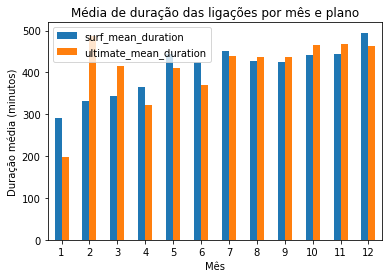

In [56]:
# Vamos gerar um gráfico de barras comparativo entre os planos
duration_mean_per_month.plot.bar(x='month', y=['surf_mean_duration', 'ultimate_mean_duration'], rot=0)
plt.title('Média de duração das ligações por mês e plano')
plt.xlabel('Mês')
plt.ylabel('Duração média (minutos)')
plt.show()

Iremos agora calcular o somatório mensal da duração das ligações dos usuários agrupado por mês e tipo de plano e avaliar como se comporta o tempo de ligação pro grupo mensalmente.

Pela média já conseguimos ter uma boa noção, iremos gerar esse dado como comparativo de comportamento. Iremos, gerar histogramas do comportamento geral e agrupado por tipo de plano.

In [57]:
# Compare o número de minutos que os usuários de cada plano requerem a cada mês. Construa um histograma.

duration_sum_per_month = df_chamadas.pivot_table(index='month', columns='plan_name', values='sum_duration', aggfunc='sum')
duration_sum_per_month.columns.name = None
duration_sum_per_month.reset_index(inplace=True)

# Renomeando as colunas
duration_sum_per_month.rename(columns={ 'surf': 'surf_sum_duration', 'ultimate': 'ultimate_sum_duration'}, inplace=True)

# Mostrando df
duration_sum_per_month

,month,surf_sum_duration,ultimate_sum_duration
0,1,292,593
1,2,1653,2431
2,3,5516,2907
3,4,12811,5163
4,5,23522,8610
5,6,29778,13719
6,7,40221,20654
7,8,50896,24863
8,9,62594,31059
9,10,80024,40906


<AxesSubplot:>

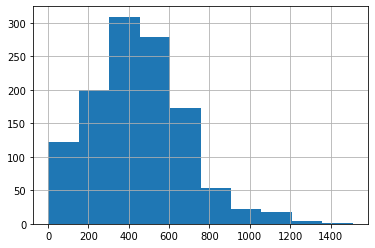

In [58]:
# Gerando histograma para plano surf
df_chamadas[df_chamadas['plan_name'] == 'surf']['sum_duration'].hist()

<AxesSubplot:>

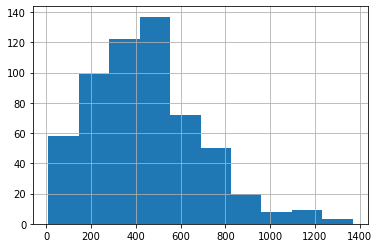

In [59]:
# Gerando histograma para plano ultimate
df_chamadas[df_chamadas['plan_name'] == 'ultimate']['sum_duration'].hist()

<AxesSubplot:>

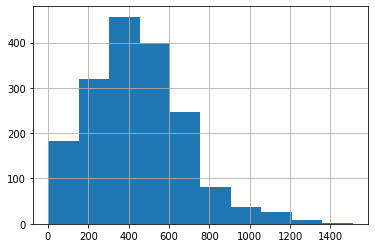

In [60]:
# Gerando histograma geral
df_chamadas['sum_duration'].hist()


Agora iremos calcular a média e a variância da duração de chamada dos grupos unidos ao longo do ano sem a distinção de planos.

In [61]:
# Calcule a média e a variação da duração mensal das chamadas

# Compare a duração média das ligações de cada plano para cada mês distinto. Faça um gráfico de barras para visualizá-lo.
mean_month = df_chamadas.pivot_table(index='month', values='sum_duration', aggfunc='mean')
mean_month.columns.name = None
mean_month.reset_index(inplace=True)

# Gerando pivot para variância
var_month = df_chamadas.pivot_table(index='month', values='sum_duration', aggfunc='var').rename_axis(columns='variance')

# Juntando os dois pivot
mean_var_month = mean_month.join(var_month, rsuffix='_var')

# Mostrando dadosb
mean_var_month.rename(columns={'sum_duration': 'mean'})


,month,mean,sum_duration_var
0,1,221.250000,NaN
1,2,408.400000,18727.583333
2,3,366.217391,80805.822222
3,4,352.431373,47166.177866
4,5,434.216216,55223.290196
5,6,406.514019,59477.158090
6,7,447.610294,45535.516311
7,8,430.448864,69865.854412
8,9,429.600917,55255.174513
9,10,449.553903,52065.936773


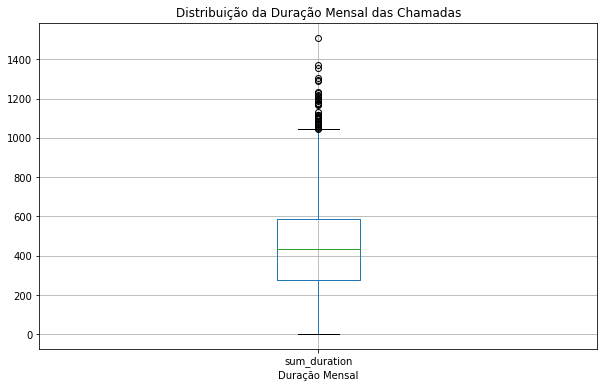

In [62]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

# cria um gráfico de diagrama de caixa
ax = df_chamadas.boxplot(column=['sum_duration'], figsize=(10, 6))

# adiciona um título e rótulos dos eixos
ax.set_title('Distribuição da Duração Mensal das Chamadas')
ax.set_xlabel('Duração Mensal')

# exibe o gráfico
plt.show()


**Conclusão Final**

Como conclusões finais podemos tirar que:

* Há um crescimento claro do uso das ligações telefonicas durante o ano para ambos os planos. Pode-se observar isso pelas médias mensais dos usuários de diferentes planos.

* A distribuição da média de duração mensal de chamadas é similar para ambos os planos sendo que há meses que os usuários do plano Ultimate usam mais, como no mês 2, e há meses que do Surf como no mês 1. Em geral os usuários do plano Ultimate tendem a crescer mais o uso de ligações ao longo do ano, pode ser observado pelo delta de crescimento no gráfico do mês 1 ao 12. 

* No geral, há mais usuários no plano Surf do que no plano Ultimate realizando ligações, isso pode ser observado pelos histogramas gerados e o número de ocorrências observadas.

* Levando o último fato em consideração é possível observar que o histograma do grupo Ultimate representa melhor o histograma geral do dados, mas pelo histograma conseguimos reiterar nossa primeira conclusão de que os usuários dos planos tem comportamento parecido, visto que, a distribuição é muito similar.

* Para ambos os planos há uma distribuição similar de dados, sendo que a maior parte dos usuários utilizam na faixa de entre 200 a 600 minutos de ligação por mês. Tendo seu pico, ou a maior parte entre 400 e 600 minutos.

* Pelo cálculo da média geral pode-se observar que os usuários em geral aumentam seu uso de ligações ao decorrer do ano. 

* A variância é muito alta, indica que os dados têm uma grande dispersão em relação à média e existem dados outliers em nossa análise que fogem da média mensalmente. Apesar disso, os dados gerais seguem os padrões clusterizados.

* Pelo boxplot gerado pode-se observar os outliers que comentamos, estes ficam após o bigode superior ou seja valores acima de 1000 minutos. O boxplot demonstra, ainda, um largo bigode inferior e superior, demonstrando que há um desvio padrão alto. O que corrobora para nossa conclusão que há uma grande dispersão na amostra.

* Nesse caso, talvez, seria interessante utilizar da mediana para cada grupo ao invês da média para cálculos de distribuição.

 ### Gerar merge_df para relembrar
 Iremos gerar nossa df completa que foi trabalhada para relembrar as colunas e ajudar na criação de uma df para análise de dados das mensagens enviadas.

In [63]:
merged_df.head(3)

,user_id,month,count_calls,sum_duration,count_message,mb_used,plan_name,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_message,extra_call,extra_internet,total_revenue
0,1000,12,16,124,11,1901.47,ultimate,2.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
1,1006,11,2,10,15,2068.37,ultimate,3.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
2,1006,12,7,59,139,32118.82,ultimate,33.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,21.0,91.0


### Mensagens

Para as mensagens iremos criar uma nova df chamada df_sms2 e selecionar as seguintes colunas de merged_df:

* month_count_message
* count_message
* plan_name
* user_id

Como para chamadas iremos calcular, média mensal de mensagens, gerar gráficos mensais comparativos entre planos por média de mensagens, gerar variância geral e somatório mensal por plano e gráfico de distribuição tipo boxplot para visualização estatística dos dados.

In [64]:
# Criando a df_sms2
df_sms2 = merged_df [['user_id','month', 'count_message', 'plan_name']]
df_sms2

,user_id,month,count_message,plan_name
0,1000,12,11,ultimate
1,1006,11,15,ultimate
2,1006,12,139,ultimate
3,1008,10,21,ultimate
4,1008,11,37,ultimate
...,...,...,...,...
1753,1496,8,2,surf
1754,1496,9,21,surf
1755,1496,10,18,surf
1756,1496,11,13,surf


In [65]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês
count_mean_per_month = df_sms2.pivot_table(index='month', columns='plan_name', values='count_message', aggfunc='mean')
count_mean_per_month.columns.name = None
count_mean_per_month.reset_index(inplace=True)

# Renomeando as colunas
count_mean_per_month.rename(columns={'surf': 'surf_mean', 'ultimate': 'ultimate_mean'}, inplace=True)

# Mostrando df
count_mean_per_month

,month,surf_mean,ultimate_mean
0,1,21.000000,20.666667
1,2,21.600000,27.800000
2,3,21.937500,34.714286
3,4,24.685714,28.937500
4,5,33.547170,44.333333
5,6,32.742857,37.135135
6,7,34.786517,41.212766
7,8,37.302521,47.929825
8,9,38.585034,45.901408
9,10,41.475138,47.488636


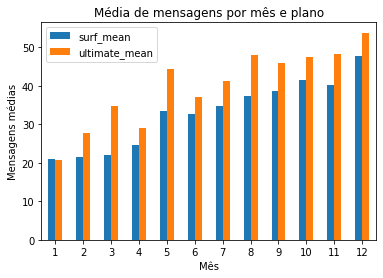

In [66]:
# Vamos gerar um gráfico de barras comparativo entre os planos
count_mean_per_month.plot.bar(x='month', y=['surf_mean', 'ultimate_mean'], rot=0)
plt.title('Média de mensagens por mês e plano')
plt.xlabel('Mês')
plt.ylabel('Mensagens médias')
plt.show()

Iremos agora calcular o somatório mensal das mensagens enviadas dos usuários agrupado por mês e tipo de plano e avaliar como se comporta as mensagens enviadas pro grupo mensalmente.

Pela média já conseguimos ter uma boa noção, iremos gerar esse dado como comparativo de comportamento. Iremos, gerar histogramas do comportamento geral e agrupado por tipo de plano.

In [67]:
# Compare o número de mensangens que os usuários de cada plano requerem a cada mês. Construa um histograma.

sms_sum_per_month = df_sms2.pivot_table(index='month', columns='plan_name', values='count_message', aggfunc='sum')
sms_sum_per_month.columns.name = None
sms_sum_per_month.reset_index(inplace=True)

# Renomeando as colunas
sms_sum_per_month.rename(columns={ 'surf': 'surf_sum', 'ultimate': 'ultimate_sum'}, inplace=True)

# Mostrando df
sms_sum_per_month


,month,surf_sum,ultimate_sum
0,1,21,62
1,2,108,139
2,3,351,243
3,4,864,463
4,5,1778,931
5,6,2292,1374
6,7,3096,1937
7,8,4439,2732
8,9,5672,3259
9,10,7507,4179


<AxesSubplot:>

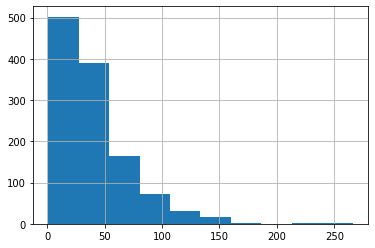

In [68]:
# Gerando histograma para plano surf
df_sms2[df_sms2['plan_name'] == 'surf']['count_message'].hist()

<AxesSubplot:>

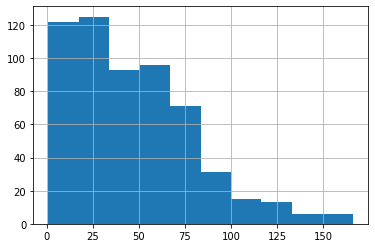

In [69]:
# Gerando histograma para plano ultimate
df_sms2[df_sms2['plan_name'] == 'ultimate']['count_message'].hist()

<AxesSubplot:>

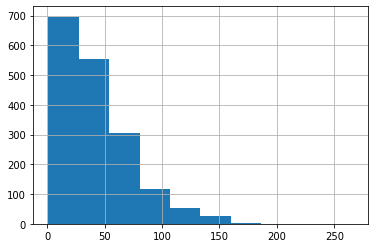

In [70]:
# Gerando histograma geral
df_sms2['count_message'].hist()

Agora iremos calcular a média e a variância da duração de chamada dos grupos unidos ao longo do ano sem a distinção de planos.

In [71]:
# Calcule a média e a variação do número de mensagens mensais enviadas

# Compare a duração média das ligações de cada plano para cada mês distinto. Faça um gráfico de barras para visualizá-lo.
mean_month2 = df_sms2.pivot_table(index='month', values='count_message', aggfunc='mean')
mean_month2.columns.name = None
mean_month2.reset_index(inplace=True)

# Gerando pivot para variância
var_month2 = df_sms2.pivot_table(index='month', values='count_message', aggfunc='var').rename_axis(columns='variance')

# Juntando os dois pivot
mean_var_month2 = mean_month2.join(var_month2, rsuffix='_var')

# Mostrando dados
mean_var_month2.rename(columns={'count_message': 'mean'})

,month,mean,count_message_var
0,1,20.750000,NaN
1,2,24.700000,206.916667
2,3,25.826087,474.011111
3,4,26.019608,443.604743
4,5,36.608108,524.859608
5,6,34.261682,998.625139
6,7,37.007353,809.213895
7,8,40.744318,814.407353
8,9,40.967890,997.208539
9,10,43.442379,907.045047


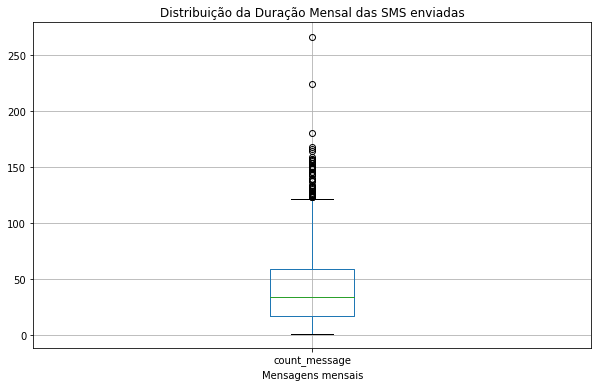

In [72]:
# Faça um diagrama de caixa para visualizar a distribuição dos envios mensais de mensagem

# cria um gráfico de diagrama de caixa
ax = df_sms2.boxplot(column=['count_message'], figsize=(10, 6))

# adiciona um título e rótulos dos eixos
ax.set_title('Distribuição da Duração Mensal das SMS enviadas')
ax.set_xlabel('Mensagens mensais')

# exibe o gráfico
plt.show()


**Conclusão Final**

Como conclusões finais podemos tirar que:

* A média de envio de mensagens por plano é maior para o Ultimate do que para o Surf, sendo que apenas no mês de Janeiro a média de envio de mensagens do plano Surf é maior que o Ultimate.

* Nos primeiros meses há um crescimento mínimo, quase nulo, da média de mensagens enviadas pelos usuários do plano Surf. Já para o plano Ultimate há um crescimento acentuado durante o ano.

* Ao longo do ano há uma tendência dos usuários do plano Ultimate e Surf aumentarem o uso do envio de mensanges, visto que a média de envio de mensagens aumenta com o passar dos meses.

* No geral, há mais usuários no plano Surf do que no plano Ultimate enviando mensagens, isso pode ser observado pelos histogramas gerados e o número de ocorrências observadas. É muito provável que hajam mais pessoas cadastradas no plano Surf. Apesar de ter mais usuários do plano Surf utilizando o serviço de SMS, os usuários do plano Ultimate enviam mais mensagens.

* Levando o último fato em consideração é possível observar que o histograma do grupo Surf representa melhor o histograma geral do dados, acredita-se que pelo maior número de usuários cadastrados no plano Surf.

* A distribuição dos planos é distinta, sendo que no plano Ultimate tem distribuição mais densa até, aproximadamente, 75 mensagens por mês. Já para o plano Surf tem densidade maior até 50 mensanges por mês. 

* O cálculo da média dos grupos corrobora com os dados e conclusões tiradas anteriormente e é possível observar o aumento na utilização do uso de sms ao longo do ano.

* Pelo boxplot gerado pode-se observar os outliers , estes ficam após o bigode superior ou seja valores acima de, aproximadamente, 125 mensagens enviadas. O boxplot demonstra, ainda, um largo bigode inferior e superior, demonstrando que há um desvio padrão alto. O que corrobora para uma ideia de alta dispersão na amostra.

* Talvez haja um aumento do número de usuários ao longo do ano. 

### Gerar merge_df para relembrar
 Iremos gerar nossa df completa que foi trabalhada para relembrar as colunas e ajudar na criação de uma df para análise de dados da internet utilizada.

In [73]:
merged_df.columns

Index(['user_id', 'month', 'count_calls', 'sum_duration', 'count_message',
       'mb_used', 'plan_name', 'gb_used', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'gb_per_month_included', 'extra_message', 'extra_call',
       'extra_internet', 'total_revenue'],
      dtype='object')

### Internet

Para o uso de internet iremos criar uma nova df chamada df_internet2 e selecionar as seguintes colunas de merged_df:

* month_sum_mb
* gb_used
* plan_name
* user_id

Como para chamadas iremos calcular, média mensal de Gigabytes usados, gerar gráficos mensais comparativos entre planos por média de uso de dados, gerar variância geral e somatório mensal por plano e gráfico de distribuição tipo boxplot para visualização estatística dos dados.

Decidimos utilizar os dados em GB, pois os dados já foram padronizados pela empresa e ficaria mais fácil para visualização geral dos dados.

In [74]:
# Criando a df_internet2
df_internet2 = merged_df [['user_id','month', 'gb_used', 'plan_name']]
df_internet2

,user_id,month,gb_used,plan_name
0,1000,12,2.0,ultimate
1,1006,11,3.0,ultimate
2,1006,12,33.0,ultimate
3,1008,10,18.0,ultimate
4,1008,11,24.0,ultimate
...,...,...,...,...
1753,1496,8,9.0,surf
1754,1496,9,17.0,surf
1755,1496,10,15.0,surf
1756,1496,11,9.0,surf


In [75]:
# Compare o número de dados que os usuários de cada plano tendem a usar a cada mês
gb_mean_per_month = df_internet2.pivot_table(index='month', columns='plan_name', values='gb_used', aggfunc='mean')
gb_mean_per_month.columns.name = None
gb_mean_per_month.reset_index(inplace=True)

# Renomeando as colunas
gb_mean_per_month.rename(columns={ 'surf': 'surf_mean', 'ultimate': 'ultimate_mean'}, inplace=True)

# Mostrando df
gb_mean_per_month


,month,surf_mean,ultimate_mean
0,1,8.000000,7.333333
1,2,9.800000,17.800000
2,3,12.812500,24.428571
3,4,12.285714,14.625000
4,5,15.377358,17.428571
5,6,16.028571,15.945946
6,7,17.235955,16.936170
7,8,17.621849,18.561404
8,9,16.986395,16.971831
9,10,17.861878,17.977273


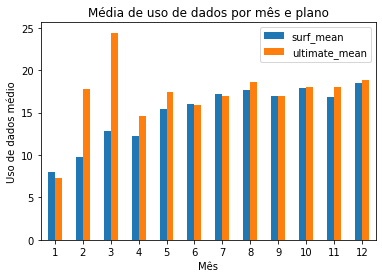

In [76]:
# Vamos gerar um gráfico de barras comparativo entre os planos
gb_mean_per_month.plot.bar(x='month', y=['surf_mean', 'ultimate_mean'], rot=0)
plt.title('Média de uso de dados por mês e plano')
plt.xlabel('Mês')
plt.ylabel('Uso de dados médio')
plt.show()

Iremos agora calcular o somatório mensal do uso de internet  dos usuários agrupado por mês e tipo de plano e avaliar como se comportam os grupos mensalmente.

Pela média já conseguimos ter uma boa noção, iremos gerar esse dado como comparativo de comportamento. Iremos, gerar histogramas do comportamento geral e agrupado por tipo de plano.

In [77]:
# Compare o número de mensangens que os usuários de cada plano requerem a cada mês. Construa um histograma.

internet_sum_per_month = df_internet2.pivot_table(index='month', columns='plan_name', values='gb_used', aggfunc='sum')
internet_sum_per_month.columns.name = None
internet_sum_per_month.reset_index(inplace=True)

# Renomeando as colunas
internet_sum_per_month.rename(columns={'surf': 'surf_sum', 'ultimate': 'ultimate_sum'}, inplace=True)

# Mostrando df
internet_sum_per_month

,month,surf_sum,ultimate_sum
0,1,8.0,22.0
1,2,49.0,89.0
2,3,205.0,171.0
3,4,430.0,234.0
4,5,815.0,366.0
5,6,1122.0,590.0
6,7,1534.0,796.0
7,8,2097.0,1058.0
8,9,2497.0,1205.0
9,10,3233.0,1582.0


<AxesSubplot:>

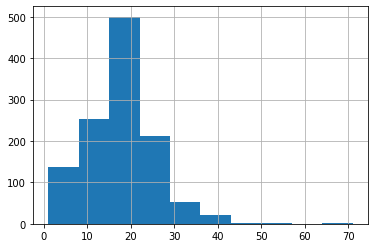

In [78]:
# Gerando histograma para plano surf
df_internet2[df_internet2['plan_name'] == 'surf']['gb_used'].hist()

<AxesSubplot:>

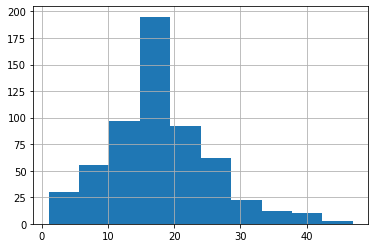

In [79]:
# Gerando histograma para plano Ultimate
df_internet2[df_internet2['plan_name'] == 'ultimate']['gb_used'].hist()

<AxesSubplot:>

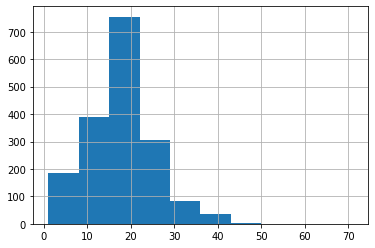

In [80]:
# Gerando histograma geral
df_internet2['gb_used'].hist()

Agora iremos calcular a média e a variância do volume de internet dos grupos unidos ao longo do ano sem a distinção de planos.

In [81]:
# Calcule a média e a variação do volume de internet mensais utilizado

# Compare a duração média das ligações de cada plano para cada mês distinto. Faça um gráfico de barras para visualizá-lo.
mean_month3 = df_internet2.pivot_table(index='month', values='gb_used', aggfunc='mean')
mean_month3.columns.name = None
mean_month3.reset_index(inplace=True)

# Gerando pivot para variância
var_month3 = df_internet2.pivot_table(index='month', values='gb_used', aggfunc='var').rename_axis(columns='variance')

# Juntando os dois pivot
mean_var_month3 = mean_month3.join(var_month3, rsuffix='_var')

# Mostrando dados
mean_var_month3.rename(columns={'gb_used': 'mean'})

,month,mean,gb_used_var
0,1,7.500000,NaN
1,2,13.800000,15.000000
2,3,16.347826,56.177778
3,4,13.019608,94.873518
4,5,15.959459,68.579608
5,6,16.000000,58.751759
6,7,17.132353,60.415094
7,8,17.926136,67.330501
8,9,16.981651,62.183084
9,10,17.899628,45.861413


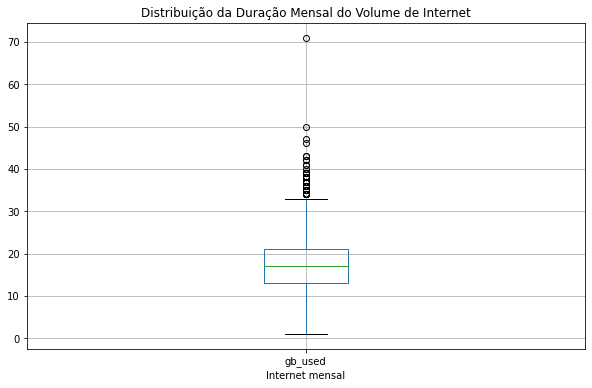

In [82]:
# Faça um diagrama de caixa para visualizar a distribuição do volume mensal de internet

# cria um gráfico de diagrama de caixa
ax = df_internet2.boxplot(column=['gb_used'], figsize=(10, 6))

# adiciona um título e rótulos dos eixos
ax.set_title('Distribuição da Duração Mensal do Volume de Internet')
ax.set_xlabel('Internet mensal')

# exibe o gráfico
plt.show()

In [83]:
# Calculando os bigodes

# Obtenha as estatísticas descritivas da coluna 
stats = df_internet2['gb_used'].describe()

# Calculando o IQR
iqr = stats['75%'] - stats['25%']

# Calculando o bigode superior e inferior
sup = stats['75%'] + 1.5 * iqr
inf = stats['25%'] - 1.5 * iqr

print("Bigode Superior:", sup)
print("Bigode Inferior:", inf)

Bigode Superior: 33.0
Bigode Inferior: 1.0



**Conclusão Final**


Como conclusões finais podemos tirar que:

* A média de uso de dados mensais tem comportamento parecido com o envio de mensagens, em que o plano Surf começa superior em Janeiro e acaba sendo superado nos meses seguintes. O plano Ultimate tem seu pico de uso de dados em Março.

* Há um aumento no uso de dados gradativos ao longo do ano, mas sem um padrão definido entre meses para ambos os planos.

* No geral, há mais usuários no plano Surf do que no plano Ultimate usando internet, isso pode ser observado pelos histogramas gerados e o número de ocorrências observadas. É muito provável que hajam mais pessoas cadastradas no plano Surf. Apesar de ter mais usuários do plano Surf utilizando o serviço de internet, os usuários do plano Ultimate usam mais a internet.

* Levando o último fato em consideração é possível observar que o histograma do grupo Surf representa melhor o histograma geral do dados, acredita-se que pelo maior número de usuários cadastrados no plano Surf.

* A distribuição dos planos é distinta, sendo que no plano Ultimate distingue-se por um pico entre 15gb até, aproximadamente, 30gb utilizados, acontecimento que não ocorre no plano Surf que tem valores entre 10gb e 20gb de pico.

* O cálculo da média dos grupos corrobora com os dados e conclusões tiradas anteriormente e é possível observar o aumento na utilização do uso de internet ao longo do ano. Há uma variância considerável apontando outliers.

* Pelo boxplot gerado pode-se observar os outliers , estes ficam após o bigode superior e inferior. Calculou-se os valores sendo o bigode superior em 33gb. E podemos perceber que pela análise da variância temos um alto desvio padrão.

* É possível observar que a distribuição do plano Ultimate parece do tipo normal.

 ### Gerar merge_df para relembrar
 Iremos gerar nossa df completa que foi trabalhada para relembrar as colunas e ajudar na criação de uma df para análise de dados de receita utilizada.

In [84]:
merged_df.head(3)

,user_id,month,count_calls,sum_duration,count_message,mb_used,plan_name,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_message,extra_call,extra_internet,total_revenue
0,1000,12,16,124,11,1901.47,ultimate,2.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
1,1006,11,2,10,15,2068.37,ultimate,3.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
2,1006,12,7,59,139,32118.82,ultimate,33.0,1000,30000,3000,70,7,0.01,0.01,30,0.0,0.0,21.0,91.0


Iremos criar um coluna chamada month_revenue, essa será a feita a partir das médias das colunas de mês excluindo valores igual a 0.

Faremos desta maneira, pois a média sempre será o valor do mês quando retiramos o 0. O valor 0 significa que naquele mês o usuário não teve o uso de um determinado serviço. Sabemos, no entanto, que todo mês o cliente gerou receita.

## Receita


Para o uso de internet iremos criar uma nova df chamada df_rev e selecionar as seguintes colunas de merged_df:

* total_income
* month
* plan_name
* user_id

Como para chamadas iremos calcular, média mensal de receita, gerar gráficos mensais comparativos entre planos por média de receita, gerar variância geral e somatório mensal por plano e gráfico de distribuição tipo boxplot para visualização estatística dos dados.

Iremos criar um coluna chamada month_revenue, essa será a feita a partir das médias das colunas de mês excluindo valores igual a 0.

Faremos desta maneira, pois a média sempre será o valor do mês quando retiramos o 0. O valor 0 significa que naquele mês o usuário não teve o uso de um determinado serviço. Sabemos, no entanto, que todo mês o cliente gerou receita.

In [85]:
# Criando df_rev
df_rev = merged_df [['user_id','month', 'total_revenue', 'plan_name']]
df_rev

,user_id,month,total_revenue,plan_name
0,1000,12,70.0,ultimate
1,1006,11,70.0,ultimate
2,1006,12,91.0,ultimate
3,1008,10,70.0,ultimate
4,1008,11,70.0,ultimate
...,...,...,...,...
1753,1496,8,20.0,surf
1754,1496,9,40.0,surf
1755,1496,10,20.0,surf
1756,1496,11,20.0,surf


In [86]:
# Compare o número de revenue que os usuários de cada plano tendem a usar a cada mês
rev_mean_per_month = df_rev.pivot_table(index='month', columns='plan_name', values='total_revenue', aggfunc='mean')
rev_mean_per_month.columns.name = None
rev_mean_per_month.reset_index(inplace=True)

# Renomeando as colunas
rev_mean_per_month.rename(columns={'surf': 'surf_mean', 'ultimate': 'ultimate_mean'}, inplace=True)

# Mostrando df
rev_mean_per_month


,month,surf_mean,ultimate_mean
0,1,20.000000,70.000000
1,2,25.908000,70.000000
2,3,40.413750,80.000000
3,4,42.016571,73.500000
4,5,53.494717,71.333333
5,6,54.079714,72.270270
6,7,65.286180,72.680851
7,8,67.574118,73.070175
8,9,59.984150,71.577465
9,10,68.126630,72.465909


In [87]:
# Compare a receita mensal média por plano 
rev_mean_per_month = df_rev.pivot_table(index='month', columns='plan_name', values='total_revenue', aggfunc='sum')
rev_mean_per_month.columns.name = None
rev_mean_per_month.reset_index(inplace=True)

# Renomeando as colunas
rev_mean_per_month.rename(columns={'surf': 'surf_mean', 'ultimate': 'ultimate_mean'}, inplace=True)

# Mostrando df
rev_mean_per_month


,month,surf_mean,ultimate_mean
0,1,20.00,210.0
1,2,129.54,350.0
2,3,646.62,560.0
3,4,1470.58,1176.0
4,5,2835.22,1498.0
5,6,3785.58,2674.0
6,7,5810.47,3416.0
7,8,8041.32,4165.0
8,9,8817.67,5082.0
9,10,12330.92,6377.0


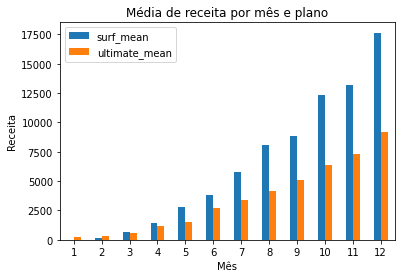

In [88]:
# Vamos gerar um gráfico de barras comparativo entre os planos
rev_mean_per_month.plot.bar(x='month', y=['surf_mean', 'ultimate_mean'], rot=0)
plt.title('Média de receita por mês e plano')
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.show()


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [89]:
# Compare o número de receita que os usuários de cada plano requerem a cada mês. Construa um histograma.

rev_sum_per_month = df_rev.pivot_table(index='month', columns='plan_name', values='total_revenue', aggfunc='sum')
rev_sum_per_month.columns.name = None
rev_sum_per_month.reset_index(inplace=True)

# Renomeando as colunas
rev_sum_per_month.rename(columns={ 'surf': 'surf_sum', 'ultimate': 'ultimate_sum'}, inplace=True)

# Mostrando df
rev_sum_per_month

,month,surf_sum,ultimate_sum
0,1,20.00,210.0
1,2,129.54,350.0
2,3,646.62,560.0
3,4,1470.58,1176.0
4,5,2835.22,1498.0
5,6,3785.58,2674.0
6,7,5810.47,3416.0
7,8,8041.32,4165.0
8,9,8817.67,5082.0
9,10,12330.92,6377.0


<AxesSubplot:>

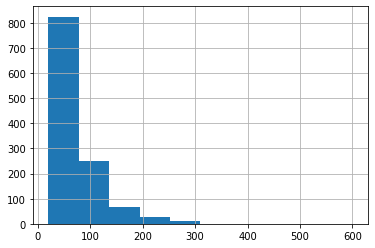

In [90]:
# Gerando histograma para plano surf
df_rev[df_rev['plan_name'] == 'surf']['total_revenue'].hist()

<AxesSubplot:>

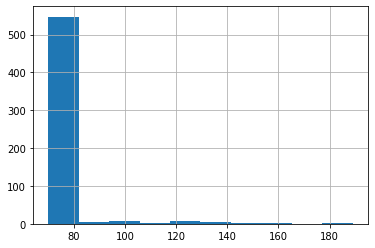

In [91]:
# Gerando histograma para plano ultimate
df_rev[df_rev['plan_name'] == 'ultimate']['total_revenue'].hist()

<AxesSubplot:>

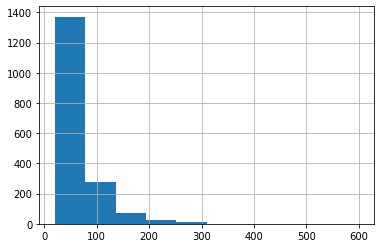

In [92]:
# Gerando histograma geral
df_rev['total_revenue'].hist()

In [93]:
# Calcule a média e a variação da receite mensais

# Compare a duração média das ligações de cada plano para cada mês distinto. Faça um gráfico de barras para visualizá-lo.
mean_month4 = df_rev.pivot_table(index='month', values='total_revenue', aggfunc='mean')
mean_month4.columns.name = None
mean_month4.reset_index(inplace=True)

# Gerando pivot para variância
var_month4 = df_rev.pivot_table(index='month', values='total_revenue', aggfunc='var').rename_axis(columns='variance')

# Juntando os dois pivot
mean_var_month4 = mean_month4.join(var_month4, rsuffix='_var')

# Mostrando dados
mean_var_month4.rename(columns={'total_revenue': 'mean'})

,month,mean,total_revenue_var
0,1,57.500000,NaN
1,2,47.954000,625.000000
2,3,52.461739,575.194493
3,4,51.893725,824.618333
4,5,58.557027,1239.431600
5,6,60.369907,1887.806627
6,7,67.841691,1795.873816
7,8,69.354091,2347.000465
8,9,63.759954,2444.987993
9,10,69.546171,1539.326766


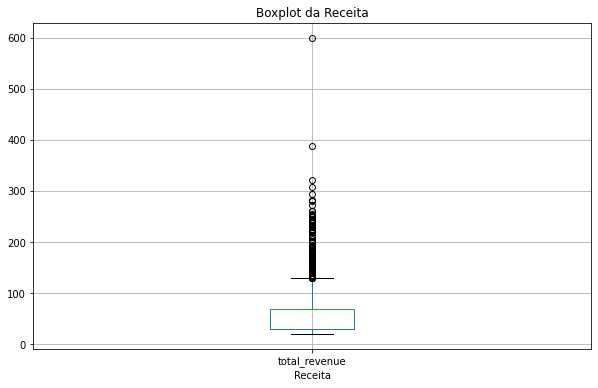

In [94]:
# Faça um diagrama de caixa para visualizar a distribuição do volume mensal de internet

# cria um gráfico de diagrama de caixa
ax = df_rev.boxplot(column=['total_revenue'], figsize=(10, 6))

# adiciona um título e rótulos dos eixos
ax.set_title('Boxplot da Receita')
ax.set_xlabel('Receita')

# exibe o gráfico
plt.show()

In [95]:
# Calculando os bigodes

# Obtenha as estatísticas descritivas da coluna 
stats = df_rev['total_revenue'].describe()

# Calculando o IQR
iqr = stats['75%'] - stats['25%']

# Calculando o bigode superior e inferior
sup = stats['75%'] + 1.5 * iqr

print("Bigode Superior:", sup)

Bigode Superior: 130.0



**Conclusão Final**

Como conclusões finais podemos tirar que:

* Pode-se observar que o plano Surf tem baixa adesão no começo do ano, mas após o mês 3 o valor de receita desse plano cresce muito superando o plano Ultimate para o resto dos outros períodos.

* O plano Surf gera mais receita devido aos custos extras empregados. Iremos posteriromente, por via de curiosidade, analisar qual o custo extra que mais traz rentabilidade para os planos.

* Há um aumento , que parece exponencial, no valor de receita para o plano Surf chegando a ser quase 2x maior que o plano Ultimate.

* Por meio das últimas análises e ao ver o histograma, é possível ver que há maior adesão ao plano Surf o que é bom, pois gera mais receita e tem maior adesão.

* Ambos os planos tem maior incidência de receita entre 20 a 80 USD. 

* A distribuição dos planos é distinta, pode-se ver que dificilmente os usuários do plano Ultimate pagam mais do que 80 USD.

* O cálculo da média dos grupos corrobora com os dados e conclusões tiradas anteriormente e é possível observar o aumento na utilização da receita ao longo do ano. A variância diminui com o tempo, mostrando que a dispersão também diminuí mostrando estabilidade dos dados. 

* Pelo boxplot gerado pode-se observar os outliers , estes ficam após o bigode superior. Calculou-se os valores sendo o bigode superior em 130USD. Pode-se perceber que tem vários outliers.

* Como conclusão final, o plano Surf é mais rentável para a empresa.

#### Seção extra - análise de custo extra.

Iremos analisar qual custo extra que mais gera rentabilidade para ambos os planos. 

Para simplificar iremos somente realizar o somatório total das colunas por plano.

In [96]:
# Gerando análise agrupada por plano e custo extra

# agrupar e somar os valores das colunas extra_call e extra_internet por plan_name
df_extra_costs = merged_df.groupby('plan_name')['extra_message', 'extra_call', 'extra_internet'].sum().reset_index()

# visualizar o novo DataFrame com os valores agrupados e somados
print(df_extra_costs)

  plan_name  extra_message  extra_call  extra_internet
0      surf         303.63     2393.31         48400.0
1  ultimate           0.00        0.00          1533.0


/tmp/ipykernel_43/1291486158.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_extra_costs = merged_df.groupby('plan_name')['extra_message', 'extra_call', 'extra_internet'].sum().reset_index()


**Conclusão extra**

* Em ambos os planos a internet é a maior fonte de receita extra.

* Para o plano Surf a fonte de internet extra é quase 40x maior.

* O plano ultimate não tem fonte extra por mensangens e ligações.

* A fonte extra de mensagem é a menos rentável para o plano Surf.

## Testar hipóteses estatísticas


Agora iremos realizar testes de hipóteses para validação de alguns pontos. Iremos validar as seguintes hipóteses:

* A receita média dos usuários dos planos Ultimate e Surf são diferentes.

* A receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões.

Para tal iremos criar uma nova dataframe adicionando a coluna 'state' de df_users que limpamos. Iremos realizar a função **merge** utilizando como base a coluna user_id para mesclar as duas colunas.

In [97]:
# Criando nova df com 'state'
df_state = df_users [['user_id', 'state']]

# Merge em duas dfs
merged_df = pd.merge(merged_df, df_state, on='user_id', how='left')

# Mostando merged_df
merged_df

,user_id,month,count_calls,sum_duration,count_message,mb_used,plan_name,gb_used,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_message,extra_call,extra_internet,total_revenue,state
0,1000,12,16,124,11,1901.47,ultimate,2.0,1000,30000,...,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0,GA MSA
1,1006,11,2,10,15,2068.37,ultimate,3.0,1000,30000,...,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0,CA MSA
2,1006,12,7,59,139,32118.82,ultimate,33.0,1000,30000,...,70,7,0.01,0.01,30,0.0,0.0,21.0,91.0,CA MSA
3,1008,10,54,476,21,17106.99,ultimate,18.0,1000,30000,...,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0,FL MSA
4,1008,11,50,446,37,23676.72,ultimate,24.0,1000,30000,...,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0,FL MSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,1496,8,14,122,2,8605.66,surf,9.0,50,15000,...,20,10,0.03,0.03,15,0.0,0.0,0.0,20.0,LA MSA
1754,1496,9,45,414,21,16389.27,surf,17.0,50,15000,...,20,10,0.03,0.03,15,0.0,0.0,20.0,40.0,LA MSA
1755,1496,10,34,316,18,14287.36,surf,15.0,50,15000,...,20,10,0.03,0.03,15,0.0,0.0,0.0,20.0,LA MSA
1756,1496,11,32,308,13,8547.36,surf,9.0,50,15000,...,20,10,0.03,0.03,15,0.0,0.0,0.0,20.0,LA MSA



### Teste para receita média de planos

Agora iremos formular nossas hipóteses h0 e h1 e escolher o teste com nosso alfa.

Primeiramente iremos testar a seguinte hipótese:

* A receita média dos usuários dos planos Ultimate e Surf são diferentes.

O teste que escolhemos será:

* Teste t de Student que é utilizado para comparar a diferença entre duas médias de amostras independentes, assumindo que as amostras são aleatórias, independentes e normalmente distribuídas, além disso tem um alto poder estatístico, ou seja, é capaz de detectar diferenças significativas mesmo com amostras relativamente pequenas. Isso faz dele uma opção adequada para muitas situações em que a normalidade e a independência das amostras podem ser assumidas.

O alfa que escolhemos será:

* Alfa ou p-teste de 0,05, pois é um valor comumente utilizado e que significa que a probabilidade de rejeitar a hipótese nula quando ela é verdadeira é de 5%. Sendo 5% um valor muito abaixo.

As hipóteses serão:

* H0: A receita média dos usuários dos planos Ultimate e Surf são iguais.
* H1: A receita média dos usuários dos planos Ultimate e Surf são diferentes.

In [98]:
# Teste as hipóteses

# Separando as colunas para teste
cols = ['plan_name', 'total_revenue']
data = merged_df[cols]

# Separar as amostras dos planos Ultimate e Surf
ultimate = data[data['plan_name'] == 'ultimate']['total_revenue']
surf = data[data['plan_name'] == 'surf']['total_revenue']

# Aplicar o teste t de Student
t_stat, p_value = ttest_ind(ultimate, surf)

# Mostrar resultados
if p_value < 0.05:
    print("Rejeita H0: A receita média dos usuários dos planos Ultimate e Surf são diferentes.")
    print(f'{p_value}')
else:
    print("Não rejeita H0: A receita média dos usuários dos planos Ultimate e Surf são iguais.")
    print(f'{p_value}')

Rejeita H0: A receita média dos usuários dos planos Ultimate e Surf são diferentes.
6.407335843436922e-05


**Conclusão Intermediária**

Como visto na [Seção 1.15](#Receita) pode-se obercar que a receita média para ambos os planos é diferente. O mesmo é confirmado pelo teste t de Student realizado.

Sabemos que o plano Surf tem receita média maior do que o plano Ultimate.


### Teste para receita média de usuários em NY-NJ

Iremos agora realizar o teste para avaliar se os usuários em NY-NJ são diferentes dos outros.

Iremos primeiramente analisar se nossa df contem valores do tipo NY-NY e como eles estão e quais nossas considerações iniciais para o teste.

Iremos agora mostrar os valores que contem NY-NJ na coluna **state**.

In [99]:
# mostrando valores para NY-NJ
merged_df[merged_df['state'].str.contains('NY-NJ')]['state'].unique()

array(['NY-NJ-PA MSA'], dtype=object)

In [100]:
# mostrando valores para somente NY
merged_df[merged_df['state'].str.contains('NY')]['state'].unique()

array(['NY-NJ-PA MSA', 'NY MSA'], dtype=object)

In [101]:
# mostrando valores para somente NJ
merged_df[merged_df['state'].str.contains('NJ')]['state'].unique()

array(['PA-NJ-DE-MD MSA', 'NY-NJ-PA MSA'], dtype=object)

**Conclusão**

Podemos observar que temos vários tipos para as string NY, NJ ou NY-NJ.

Da maneira com que foi nos passado iremos considerar que os usuários cadastrados com NY-NJ que serão considerados.

Ou seja, os usuários cadastrados com somente NY, ou com PA-NJ-DE-MD MSA não serão considerados para nossa hipótese verdadeira no teste e serão pertencentes ao outro grupo.

#### Padrões de teste

Agora iremos formular nossas hipóteses h0 e h1 e escolher o teste com nosso alfa.

Primeiramente iremos testar a seguinte hipótese:

* A receita média dos usuários da área de NY-NJ difere da dos usuários das demais regiões;

O teste que escolhemos será:

* Para variar um pouco e testar outros métodos iremos utilizar o método de ANOVA, pois é apropriado porque permite comparar as médias de receita de diferentes grupos (NY-NJ e outras regiões). O teste ANOVA também é adequado para lidar com mais de dois grupos, o que é necessário para a comparação entre NY-NJ e outras regiões.

O alfa que escolhemos será:

* Alfa ou p-teste de 0,05, pois é um valor comumente utilizado e que significa que a probabilidade de rejeitar a hipótese nula quando ela é verdadeira é de 5%. Sendo 5% um valor muito abaixo.

As hipóteses serão:

* H0: As médias das receitas dos usuários da área de NY-NJ são iguais às médias das receitas dos usuários das demais regiões.
* H1: As médias das receitas dos usuários da área de NY-NJ são diferentes das médias das receitas dos usuários das demais regiões.


In [102]:
# Teste as hipóteses

# Seleciona as colunas relevantes para o teste
cols = ['state', 'total_revenue']
data = merged_df[cols]

# Separa as amostras dos usuários da área de NY-NJ e das demais regiões
ny_nj = data[data['state'].str.contains('NY-NJ')]['total_revenue']
outras_regioes = data[~data['state'].str.contains('NY-NJ')]['total_revenue']


In [103]:
ny_nj

29      70.00
30      70.00
31      70.00
32      70.00
33      70.00
        ...  
1748    40.00
1749    40.00
1750    23.48
1751    60.27
1752    30.00
Name: total_revenue, Length: 278, dtype: float64

In [104]:
outras_regioes

0       70.0
1       70.0
2       91.0
3       70.0
4       70.0
        ... 
1753    20.0
1754    40.0
1755    20.0
1756    20.0
1757    40.0
Name: total_revenue, Length: 1480, dtype: float64

In [105]:
# Realiza o teste de ANOVA
f_stat, p_value = f_oneway(ny_nj, outras_regioes)

# Imprime os resultados
print("F-statistic: ", f_stat)
print("p-value: ", p_value)

# Define o nível de significância
alfa = 0.05

# Verifica se a hipótese nula é rejeitada ou não
if p_value < alfa:
    print("Rejeita H0: As médias das receitas dos usuários da área de NY-NJ são diferentes das médias das receitas dos usuários das demais regiões.")
else:
    print("Não rejeita H0: As médias das receitas dos usuários da área de NY-NJ são iguais às médias das receitas dos usuários das demais regiões.")

F-statistic:  5.0100766467642766
p-value:  0.025325082305804603
Rejeita H0: As médias das receitas dos usuários da área de NY-NJ são diferentes das médias das receitas dos usuários das demais regiões.


**Conclusão**

Ainda não havíamos trabalhado com a questão de cidades então através do teste estatístico de ANOVA pudemos observar que a média de receita dos usuários de NY-NJ são diferentes das receitas dos usuários de outras áreas.

Isso acontece, pois nosso p-value é menor que nosso alfa. Além disso, o F-statistic do método ANOVA demostra que que a variância entre os grupos é maior do que a variação dentro dos grupos. Essa diferença é significativa o suficiente para rejeitar a hipótese nula de que não há diferenças significativas entre as médias dos grupos. 

Normalmente se realiza um teste post-hoc para analisar quais grupos são diferentes entre si. Iremos realizar como extra só para analisar e tirar alguns insights. Iremos utilizar o método de Tuckey por ser mais simples.

In [106]:
# Realiza o teste de Tukey
tukey_results = pairwise_tukeyhsd(data['total_revenue'], data['state'], alpha=0.05)

# Imprime os resultados do teste
print(tukey_results.summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1          group2     meandiff p-adj    lower    upper   reject
-------------------------------------------------------------------------
         AL MSA          AZ MSA  10.3289    1.0  -43.1917  63.8495  False
         AL MSA          CA MSA   7.5415    1.0   -40.747    55.83  False
         AL MSA          CO MSA -20.5416    1.0  -76.0398  34.9566  False
         AL MSA          CT MSA  41.4102 0.8086   -19.385 102.2055  False
         AL MSA DC-VA-MD-WV MSA   4.5625    1.0   -53.113   62.238  False
         AL MSA          FL MSA  15.5421    1.0  -36.3043  67.3885  False
         AL MSA          GA MSA  20.8717    1.0  -34.6265    76.37  False
         AL MSA          HI MSA  62.4909 0.0391    1.0906 123.8911   True
         AL MSA    IL-IN-WI MSA   3.4983    1.0  -48.3481  55.3447  False
         AL MSA          IN MSA  -4.1377    1.0  -61.4807  53.2054  False
         AL MSA       KY-IN MSA   27.6

Pelos resultados obtidos podemos ver que alguns grupos são congruentes e estão representados por 'True' na coluna reject.

Obviamente necessitamos de mais testes, porém como via de regra pode-se ter uma boa noção de quais grupos são parecidos e tem ligações entre a revenue por estado de comparação.

Os estados que contem NY-NJ não tem congruência com nenhum outro estado como vimos antes no teste que realizamos com ANOVA.

## Conclusão geral

Vamos separar nossas conclusões em três seções sendo elas 

(1) Conclusões acerca do processamento de dados e limpeza;

(2) Conclusões acerca da análise de dados;

(3) Conclusões acerca as hipóteses estatísticas de dados.


Assim temos:

**(1) Conclusão acerca do processamento de dados e limpeza**

Neste projeto trabalhamos com diferentes Dataframes e foi possível concluir que nossos dados continham poucos erros e linhas nulas, o que facilitou nosso trabalho. As Dataframes não tinham muito valores nulos e nem duplicatas implícitas. 

Tivemos que corrigir alguns padrões de dados como alteração de padrões de megabytes para gigabytes, ajeitar datas de tipo object para datetime, encontrar os estados federativos onde haviam somente o nome das cidades.

Havia uma coluna na df_users chamada de **churn_date** que signifca a data em que o cliente parou de usar os serviços, neste caso decidiu-se manter a coluna para nossas análises posteriores, pois não iriam afetar nas médias finais e nas análises. Além disso, caso retirassemos iriamos perder 6,8% dos nossos dados originais.

Na Dataframe de ligações pode-se observar que os minutos estavam em um padrão diferente do que normalmente vimos, ou seja, 1 minuto tem escala numeral 0.1 - 0.99, onde normalmente seria de 0 - 60seg. Visto isso, na pré-analise de dados vimos que tinham muitos dados de ligações como 0 segundos, isso pode ser devido a chamadas perdidas. Decidiu-se filtrar os dados para somente chamadas a partir de 0.1 minutos isso é, aproximadamente, 0,6 segundos. Escolheu-se essa métrica, pois 0,6 segundos é plenamente plausível para uma ligação acontecer.

Utilizamos para todas as Dataframes a função groupby, para agrupamento de chamadas, mensagens e volume de internet utilizados para cada usuário em cada mês. Padronizamos os nomes do mês para todas as dfs para 'month' e deixamos a coluna 'user_id' isso foi feito para realização da função merge, onde juntamos todas as dataframes utilizando essas colunas como referência para a junção dos valores restantes.

Para dados de planos e valores utilizamos a coluna 'user_id' que tinhamos em df_users e posteriormente utilizamos a coluna do nome do plano para adicionar os padrões do plano que tínhamos em df_plans. Fizemos isso para calcular a receita gerada para cada usuário por mês posteriormente. 

Criamos colunas condicionais usando função de numpy em np.where ao invés de loop for, pois a função np.where é muito mais rápida e eficaz para cálculos. Com o auxílio dessa função podemos calcular os valores condicionais de cada plano para cada usuário por mês para mensagens, internet e ligações. Depois adicionou-se os valores mensais dos planos para receita total.

No final pode-se observar que ao trabalhar com várias dataframes pode simplificar nossos passos incialmente, mas a padronização dos nomes das colunas é essencial e deve ser pensada de maneira que não vá afetar e acarretar em erros em nossa dataframe final.


**(2) Conclusões acerca da análise de dados**

A análise dos dados dos usuários dos planos Surf e Ultimate permitiu concluir que, apesar de alguns padrões de comportamento distintos, os usuários de ambos os planos possuem padrões de uso similares. No que diz respeito ao uso de chamadas telefônicas, verificou-se um crescimento no uso de ligações durante o ano para ambos os planos, mas os usuários do plano Ultimate tendem a crescer mais o uso de ligações ao longo do ano. Quanto ao envio de mensagens, os usuários do plano Ultimate enviam mais mensagens em média do que os usuários do plano Surf, o que pode ser explicado pelo pacote de dados maior oferecido pelo plano Ultimate.

Em relação à utilização de dados, os usuários do plano Surf começam com um uso maior de internet em janeiro, mas são superados pelos usuários do plano Ultimate nos meses seguintes. Há uma dispersão de dados alta e a presença de outliers em todas as análises realizadas. Isso sugere a possibilidade de uma maior variedade de comportamentos de uso entre os usuários de ambos os planos.

No entanto, a distribuição de dados para ambos os planos é muito semelhante, com a maior parte dos usuários utilizando na faixa de entre 200 a 600 minutos de ligação por mês, entre 50 a 125 mensagens enviadas e entre 10 a 17 GB de uso de dados por mês. Esses resultados são importantes para a empresa avaliar o desempenho dos planos e oferecer melhorias para seus usuários, bem como para ajustar suas estratégias de marketing e vendas de acordo com as necessidades dos consumidores.

Com base nas análises realizadas sobre a receita dos planos Surf e Ultimate ao longo do ano, podemos concluir que o plano Surf apresenta uma adesão inicial mais baixa, mas um crescimento exponencial a partir do terceiro mês, tornando-se mais rentável do que o plano Ultimate pelo restante do período analisado. Além disso, o plano Surf gera mais receita devido aos custos extras empregados, sendo necessário analisar posteriormente qual o custo extra mais rentável para ambos os planos.

Observamos que a distribuição dos planos é distinta, com maior incidência de receita entre 20 a 80 USD para ambos, mas é raro encontrar usuários do plano Ultimate pagando mais de 80 USD. Além disso, a internet é a maior fonte de receita extra para ambos os planos, mas para o plano Surf, essa fonte é quase 40 vezes maior do que para o plano Ultimate. Por outro lado, o plano Ultimate não apresenta fonte extra por mensagens e ligações.

A análise dos dados apresentou uma diminuição da variância ao longo do ano, mostrando uma maior estabilidade dos dados e a conclusão final é de que o plano Surf é mais rentável para a empresa. Porém, é importante ressaltar que a fonte extra de mensagem é a menos rentável para o plano Surf. As informações obtidas nessas análises fornecem insights importantes para a empresa tomar decisões estratégicas e otimizar seus planos e custos extras.


**(3) Conclusões acerca as hipóteses estatísticas de dados**

Com base nas informações fornecidas, foram realizados testes de hipóteses para validar algumas afirmações sobre a receita média dos usuários dos planos Ultimate e Surf, bem como a diferença entre os usuários da área de NY-NJ e os de outras regiões.

Para testar a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes, foi utilizado o teste t de Student. Esse teste é adequado para comparar a diferença entre duas médias de amostras independentes, assumindo que as amostras são aleatórias, independentes e normalmente distribuídas. O alfa escolhido foi de 0,05, o que significa que a probabilidade de rejeitar a hipótese nula quando ela é verdadeira é de 5%. As hipóteses foram formuladas da seguinte maneira: H0 - A receita média dos usuários dos planos Ultimate e Surf são iguais; H1 - A receita média dos usuários dos planos Ultimate e Surf são diferentes. Os resultados mostraram que a receita média para ambos os planos é diferente, sendo a receita média do plano Surf maior do que a do plano Ultimate.

Para testar a hipótese de que a receita média dos usuários da área de NY-NJ difere da dos usuários das demais regiões, foi utilizado o teste de ANOVA. Esse teste é adequado para comparar as médias de receita de diferentes grupos, permitindo a comparação entre NY-NJ e outras regiões. O alfa escolhido foi de 0,05, e as hipóteses foram formuladas da seguinte maneira: H0 - As médias das receitas dos usuários da área de NY-NJ são iguais às médias das receitas dos usuários das demais regiões; H1 - As médias das receitas dos usuários da área de NY-NJ são diferentes das médias das receitas dos usuários das demais regiões. Os resultados mostraram que a média de receita dos usuários de NY-NJ é diferente das receitas dos usuários de outras áreas, com um p-value menor que o alfa. Além disso, o F-statistic do método ANOVA demostra que que a variância entre os grupos é maior do que a variação dentro dos grupos, o que é significativo o suficiente para rejeitar a hipótese nula de que não há diferenças significativas entre as médias dos grupos.

Com base nesses resultados, pode-se concluir que os usuários do plano Surf têm uma receita média maior do que os usuários do plano Ultimate, e que a receita média dos usuários da área de NY-NJ é diferente das receitas dos usuários de outras áreas. Esses insights podem ser úteis para a empresa na elaboração de estratégias de marketing e de preços para diferentes segmentos de usuários.

Por meio do teste de Tuckey pode-se concluir que existem grupos que são considerados congruentes e que são representados pelo valor "True" na coluna "reject". Embora sejam necessários mais testes para uma análise mais precisa, pode-se ter uma boa noção de quais grupos são semelhantes e têm relações entre a receita por estado de comparação. Além disso, os estados que contêm NY-NJ mostraram não ter congruência com nenhum outro estado, como foi observado no teste realizado com ANOVA. Esses resultados fornecem informações importantes para a compreensão das relações entre a receita e os estados comparados, embora seja necessário realizar mais estudos para uma compreensão mais aprofundada.